# Graficas de series de tiempo

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, MonthLocator, WeekdayLocator

## Series de tiempo de los VI's

In [139]:
file_path = r'../../data_analysis/datos/model_predicts/zafra2023/ndvi_mean/parcela_10.csv'
file_path_2 = r'../../data_analysis/all_vars/zafra2023/parcela_10.csv'
file_path_3 = r'../../datos/parcelas/indices_stats_cleaned/parcela_14.csv'

In [140]:
df = pd.read_csv(file_path, parse_dates=True, )
df['Fecha'] = pd.to_datetime(df['Fecha'])
df2 = pd.read_csv(file_path_2)
df2['Fecha'] = pd.to_datetime(df2['Fecha'])
df3 = pd.read_csv(file_path_3)
df3['Fecha'] = pd.to_datetime(df3['Fecha'])

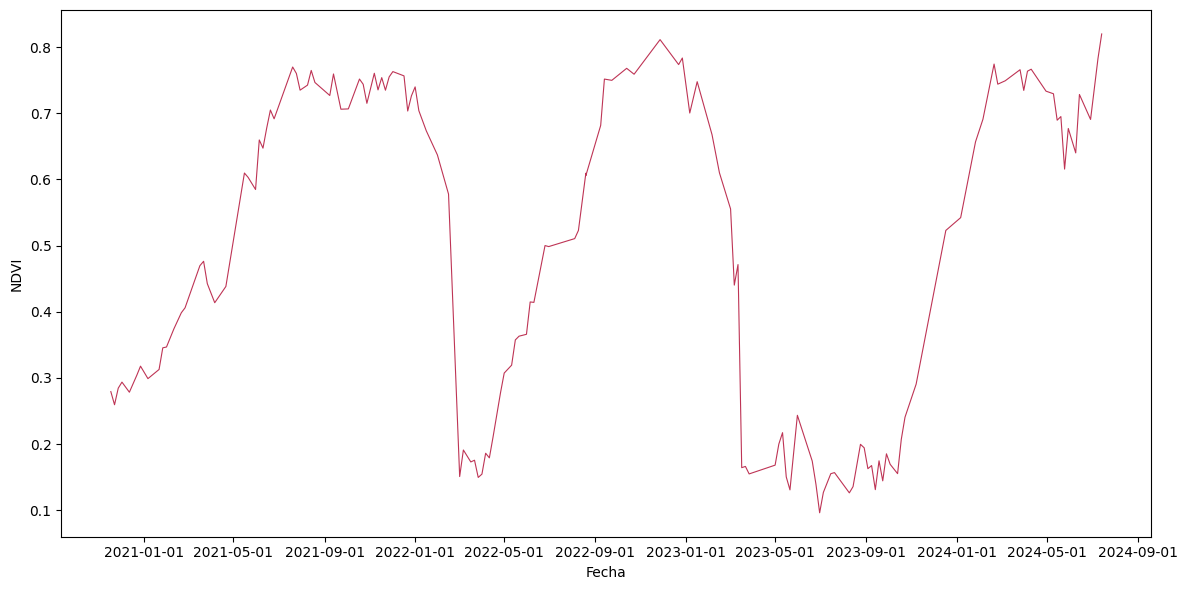

In [141]:
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.set_major_locator(MonthLocator(interval=4))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
ax.plot(df3['Fecha'], df3['ndvi_mean'], color='#BE3455', lw=0.8)
#ax.plot(df2['Fecha'], df2['ndvi'], color='g', lw=0.8)
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.tight_layout()
plt.show()

## Series de tiempo agrometeorológicas

In [6]:
agro_path = r'../../datos/agroclimate/relative_humidity/parcela_5.csv'

In [7]:
dfa = pd.read_csv(agro_path, parse_dates=True)
dfa['Fecha'] = pd.to_datetime(dfa['Fecha'])

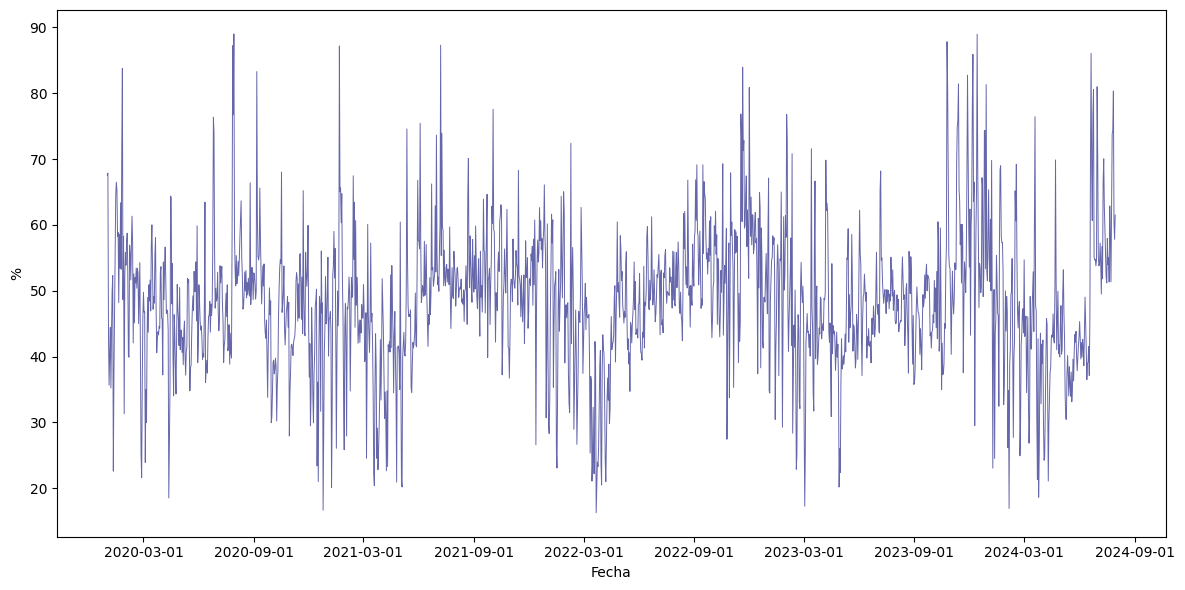

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.set_major_locator(MonthLocator(interval=6))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
ax.plot(dfa['Fecha'], dfa['rh12'], color='#6667AB', lw=0.7)
plt.xlabel('Fecha')
plt.ylabel('%')
plt.tight_layout()
#plt.savefig(r'../../tesis_img/sueltas/rh_p5.pdf', dpi=100)
plt.show()

### Comparación de modelos

In [32]:
variable = 'relative_humidity'
df_var_name = 'rh12'
raw_data = rf'../../datos/agroclimate/{variable}/parcela_5.csv'
arima = rf'../../data_analysis/datos/arima/{variable}/parcela_5.csv'
fourier = rf'../../data_analysis/datos/fourier/{variable}/parcela_5.csv'
holt = rf'../../data_analysis/datos/holtwinters/{variable}/parcela_5.csv'

In [33]:
raw_df = pd.read_csv(raw_data, parse_dates=True, index_col='Fecha')
arima_df = pd.read_csv(arima, parse_dates=True, index_col='Fecha')
fourier_df = pd.read_csv(fourier, parse_dates=True, index_col='Fecha')
holt_df = pd.read_csv(holt, parse_dates=True, index_col='Fecha')

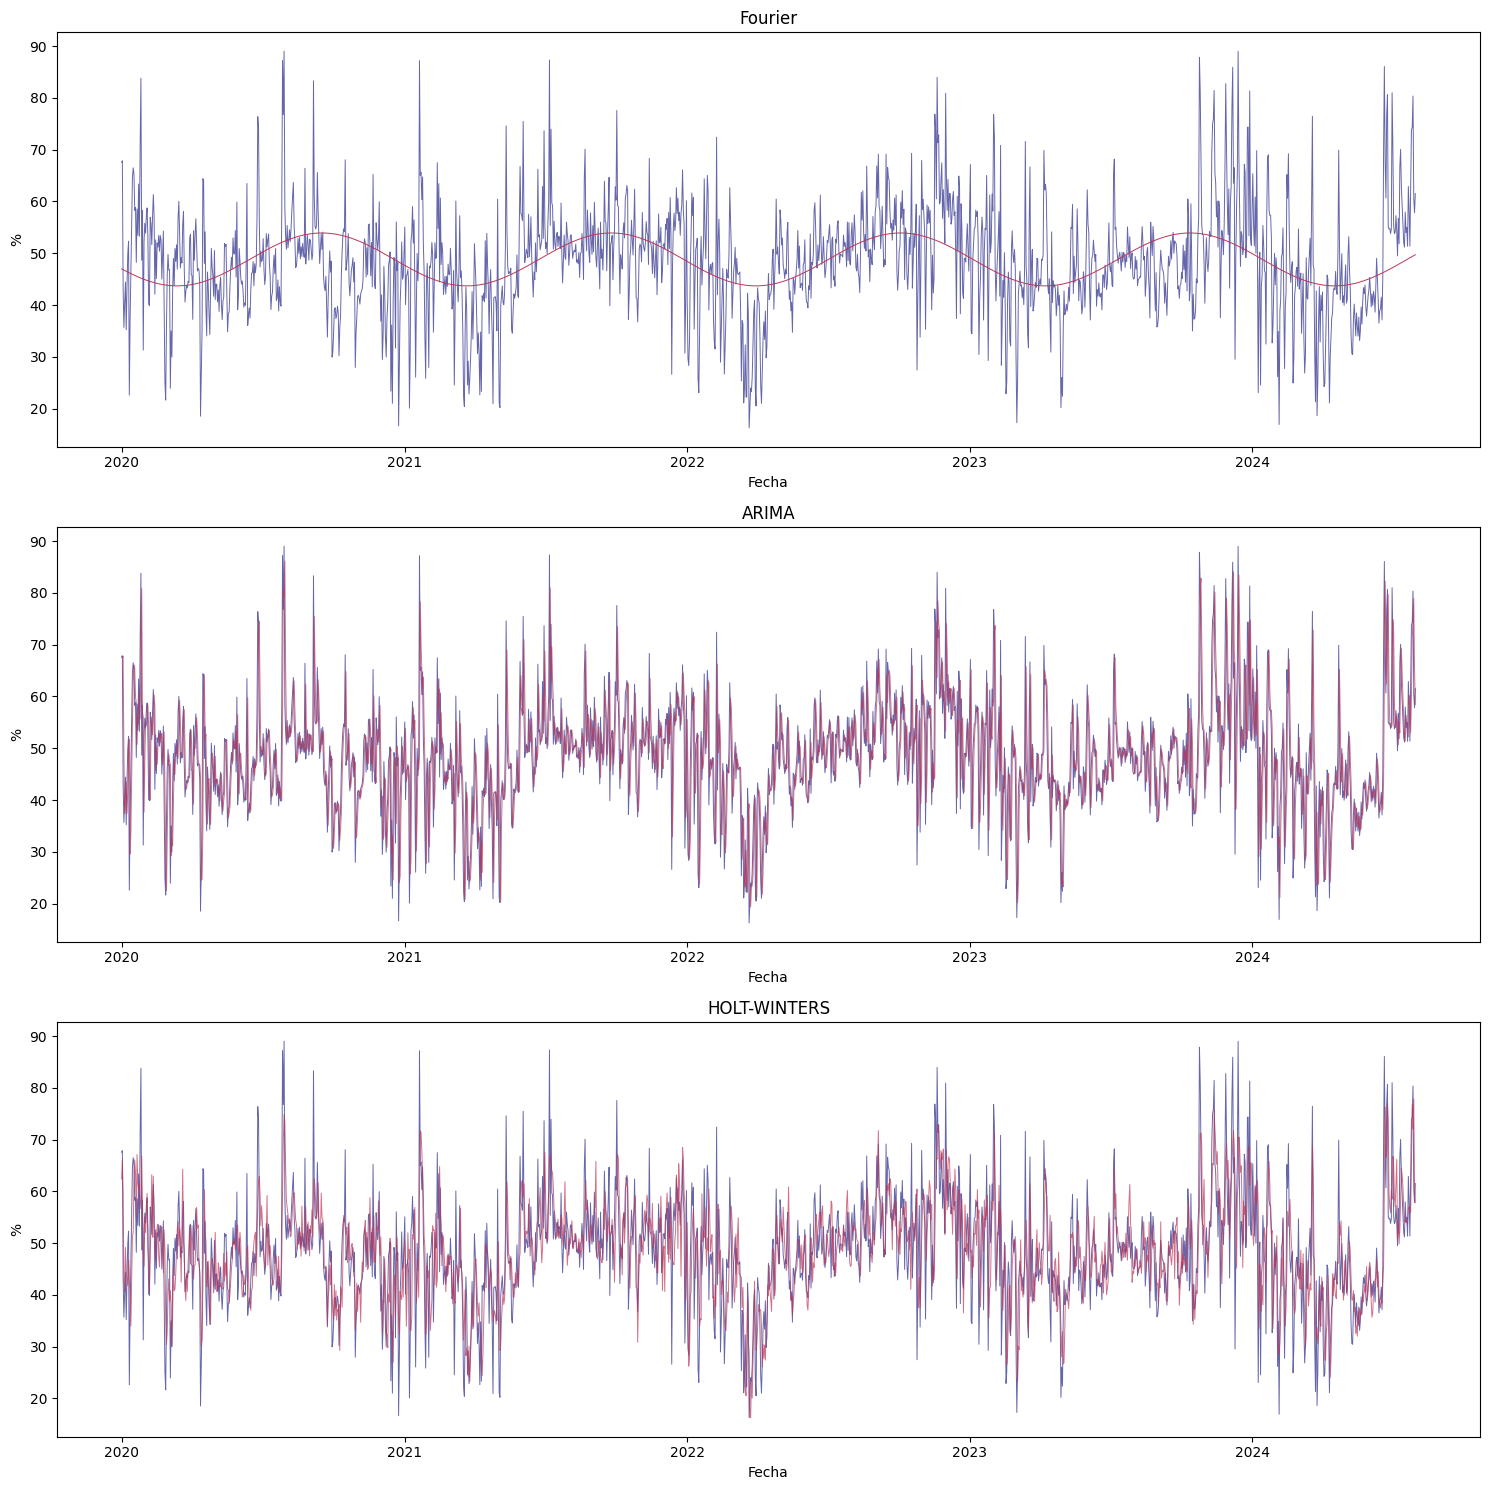

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

ax1.plot(raw_df.index, raw_df[df_var_name], color='#6667AB', lw=0.7)
ax1.plot(fourier_df.index, fourier_df[f'ajustados_{df_var_name}'], color='#BE3455', lw=0.7)
ax1.set_title('Fourier')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('%')

ax2.plot(raw_df.index, raw_df[df_var_name], color='#6667AB', lw=0.7)
ax2.plot(arima_df.index[1:], arima_df[f'{df_var_name}_arima'].iloc[1:], color='#BE3455', lw=0.7, alpha=0.7)
ax2.set_title('ARIMA')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('%')

ax3.plot(raw_df.index, raw_df[df_var_name], color='#6667AB', lw=0.7)
ax3.plot(holt_df.index, holt_df[f'{df_var_name}_holtwin_predicts'],color='#BE3455', lw=0.7, alpha=0.7)
ax3.set_title('HOLT-WINTERS')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('%')

# Ajustar diseño para que las subfiguras no se sobrepongan
plt.tight_layout()

plt.savefig(r'../../tesis_img/sueltas/rh_p5_modelos.pdf', dpi=200)
# Mostrar la figura
plt.show()

### Distribución de lluvia

In [2]:
parcela_all = r'../../data_analysis/all_vars/zafra2022/parcela_5.csv'
df_p_all = pd.read_csv(parcela_all, index_col='Fecha', parse_dates=True)

In [12]:
df_p_all.describe()

,Parcela,dias,ndvi,gndvi,cire,ndre1,ndmi,msi,temp,dia_x,...,dia,reconstruida_et,ajustados_et,et_acum,et_acum_ajustados,rh12,rh12_holtwin_predicts,kc,etc,etc_acum
count,391.0,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,5.0,196.000000,0.598963,0.538535,1.555905,0.339130,0.133269,0.823734,299.037393,1012.000000,...,1012.000000,4.423321,4.404496,957.403105,940.682516,49.855412,49.799026,0.858808,3.630896,729.816310
std,0.0,113.016223,0.174605,0.123511,0.677350,0.125552,0.180565,0.415624,4.378677,113.016223,...,113.016223,1.285929,1.059779,478.416590,484.223360,9.914530,8.710396,0.200796,1.066563,431.548524
min,5.0,1.000000,0.113255,0.194845,-0.219870,-0.002106,-0.373743,0.416854,280.186340,817.000000,...,817.000000,1.514302,2.838077,5.480632,4.569600,17.278551,22.604948,0.300244,1.088831,1.645525
25%,5.0,98.500000,0.494563,0.464876,1.073723,0.255752,0.047030,0.484389,296.608885,914.500000,...,914.500000,3.294436,3.349167,562.876012,540.751462,43.973518,44.484331,0.738747,2.878093,328.643686
50%,5.0,196.000000,0.652054,0.576421,1.750903,0.376116,0.192840,0.684456,300.022670,1012.000000,...,1012.000000,4.559008,4.536179,1044.673959,1030.328349,49.796658,50.463737,0.919862,3.688253,787.249217
75%,5.0,293.500000,0.747262,0.643380,2.156581,0.448398,0.280865,1.020538,302.422285,1109.500000,...,1109.500000,5.563743,5.397070,1336.966520,1334.068202,55.864947,55.702698,1.029351,4.396710,1093.690746
max,5.0,391.000000,0.779092,0.665865,2.292981,0.472665,0.310320,1.990635,305.944460,1207.000000,...,1207.000000,6.838213,5.908162,1729.907139,1722.158052,83.954500,72.703186,1.065956,6.007475,1419.680198


(array([136., 253.,   1.,   1.]),
 array([ 0. ,  0.1, 25. , 30. ,  inf]),
 <BarContainer object of 4 artists>)

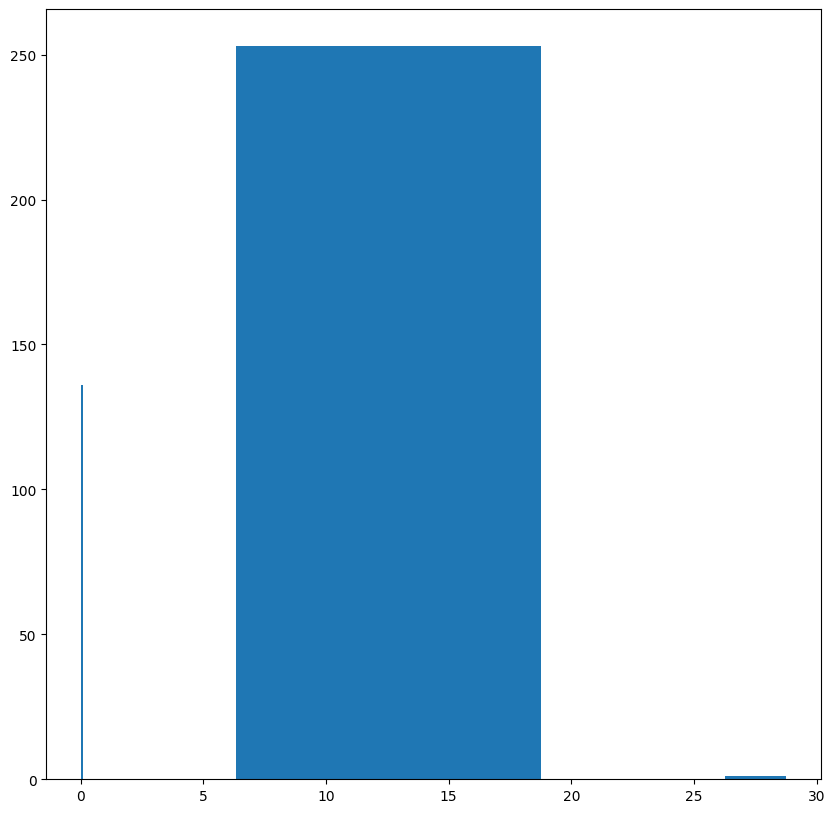

In [36]:
bins = [0, 0.1, 25,30, float('inf')]
plt.figure(figsize=(10,10))
plt.hist(df_p_all['precip'], bins=bins, rwidth=0.5)

## Series en conjunto

In [37]:
p5_all = r'../../data_analysis/all_vars/zafra2022/parcela_5.csv'

In [38]:
df_all = pd.read_csv(p5_all, index_col='Fecha', parse_dates=True)

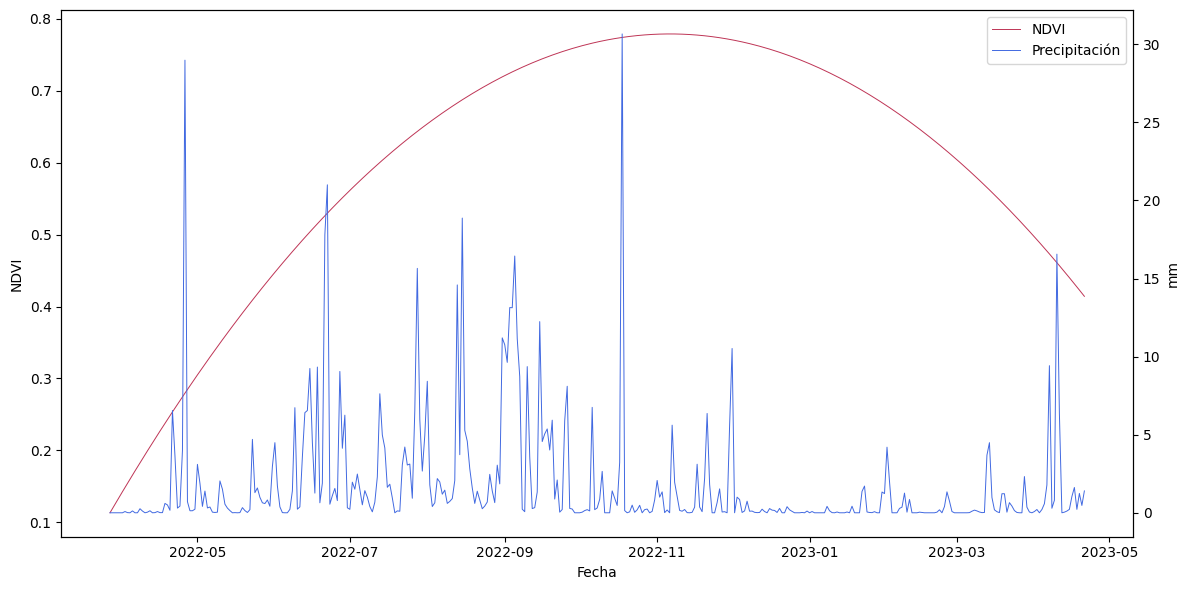

In [42]:
var_name = 'ndvi'
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df_all.index, df_all[var_name], color='#BE3455', lw=0.7, label=var_name.upper())
ax1.set_xlabel('Fecha')
ax1.set_ylabel(f'{var_name.upper()}')
ax2 = ax1.twinx()
#ax2.plot(df_all.index, df_all['ajustados_et'], color=(150/255, 0, 24/255), lw=0.7, label='Fourier')
ax2.plot(df_all.index, df_all['precip'], color='royalblue', lw=0.7, label='Precipitación')
# ax2.plot(df_all.index, df_all['etc'], color='blueviolet', lw=0.7, label='ETc')
ax2.set_ylabel('mm')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.tight_layout()
# plt.savefig(r'../../tesis_img/sueltas/ndvi_precip_acum.pdf', dpi=200)
plt.show()

### Parcelas juntas

In [2]:
blocks_21 = r'../../data_analysis/all_vars/zafra2021/'
blocks_22 = r'../../data_analysis/all_vars/zafra2022/'
blocks_23 = r'../../data_analysis/all_vars/zafra2023/'

In [14]:
df_list_21 = []
for i in os.listdir(blocks_21):
    i_path = os.path.join(blocks_21, i)
    df_list_21.append(pd.read_csv(i_path))
df_21 = pd.concat(df_list_21, ignore_index=True, axis=0)
df_21['Fecha'] = pd.to_datetime(df_21['Fecha'])

df_list_22 = []
for i in os.listdir(blocks_22):
    i_path = os.path.join(blocks_22, i)
    df_list_22.append(pd.read_csv(i_path))
df_22 = pd.concat(df_list_22, ignore_index=True, axis=0)
df_22['Fecha'] = pd.to_datetime(df_22['Fecha'])

df_list_23 = []
for i in os.listdir(blocks_23):
    i_path = os.path.join(blocks_23, i)
    df_list_23.append(pd.read_csv(i_path))
df_23 = pd.concat(df_list_23, ignore_index=True, axis=0)
df_23['Fecha'] = pd.to_datetime(df_23['Fecha'])

In [16]:
df_21.drop(df_21[df_21['Parcela'] == 4].index, inplace=True)
df_23.drop(df_23[df_23['Parcela'] == 1].index, inplace=True)
df_23.drop(df_23[df_23['Parcela'] == 6].index, inplace=True)
df_23.drop(df_23[df_23['Parcela'] == 14].index, inplace=True)
df_23.drop(df_23[df_23['Parcela'] == 16].index, inplace=True)

In [17]:
concat_blocks = pd.concat([df_21, df_22, df_23])

In [18]:
concat_blocks['Fecha'] = pd.to_datetime(concat_blocks['Fecha'])

In [19]:
concat_blocks

,Parcela,Fecha,dias,ndvi,gndvi,cire,ndre1,ndmi,msi,temp,...,dia,reconstruida_et,ajustados_et,et_acum,et_acum_ajustados,rh12,rh12_holtwin_predicts,kc,etc,etc_acum
0,1,2020-11-27,1.0,0.170055,0.318524,-0.028833,0.019221,-0.273165,1.646446,299.23804,...,332,3.369666,2.990989,3.600686,2.990989,49.733070,51.842652,0.365563,1.316277,1.316277
1,1,2020-11-28,2.0,0.173345,0.320201,-0.017418,0.021708,-0.270546,1.640788,299.33347,...,333,3.298553,2.982760,6.792382,5.973749,51.859024,57.577093,0.369347,1.178844,2.495121
2,1,2020-11-29,3.0,0.176624,0.321871,-0.006046,0.024187,-0.267935,1.635148,295.38672,...,334,3.186807,2.974998,9.006095,8.948747,59.278910,49.490472,0.373118,0.825976,3.321097
3,1,2020-11-30,4.0,0.179892,0.323536,0.005283,0.026656,-0.265332,1.629526,290.24933,...,335,3.046492,2.967705,12.022931,11.916452,43.918488,46.937814,0.376876,1.136972,4.458069
4,1,2020-12-01,5.0,0.183148,0.325195,0.016569,0.029116,-0.262738,1.623923,290.58194,...,336,2.887152,2.960885,14.965470,14.877337,35.465054,50.551949,0.380620,1.119989,5.578058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,9,2024-06-10,302.0,0.589249,0.545763,1.444789,0.321413,0.250406,0.618858,305.76627,...,1623,6.052977,5.901081,1285.202474,1244.304833,49.039047,47.004960,0.847637,4.886736,1016.440254
5871,9,2024-06-11,303.0,0.586806,0.544442,1.431913,0.319172,0.249266,0.621491,306.29056,...,1624,6.183684,5.901359,1291.251026,1250.206191,45.242650,41.499714,0.844827,5.109979,1021.550234
5872,9,2024-06-12,304.0,0.584336,0.543104,1.418912,0.316909,0.248105,0.624170,307.05650,...,1625,6.400545,5.901180,1297.875661,1256.107371,41.117607,44.480413,0.841986,5.577849,1027.128083
5873,9,2024-06-13,305.0,0.581838,0.541750,1.405787,0.314622,0.246923,0.626895,306.76294,...,1626,6.612967,5.900544,1304.312806,1262.007915,36.507230,40.168057,0.839114,5.401500,1032.529583


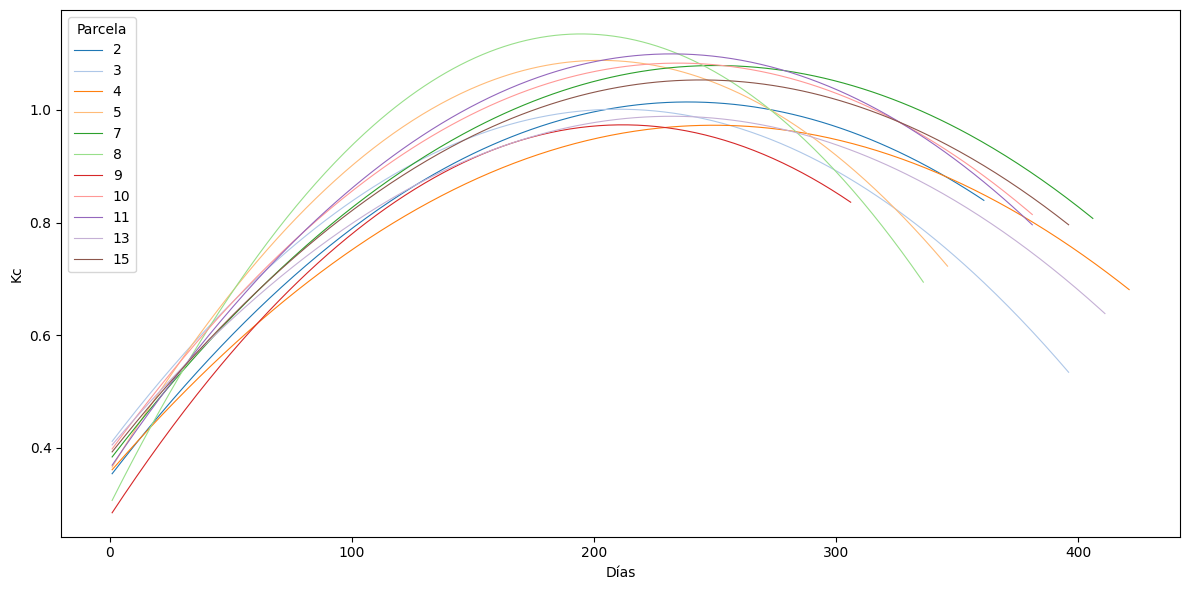

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_23, x='dias', y='kc', hue='Parcela', lw=0.8, palette='tab20')
plt.xlabel('Días')
plt.ylabel('Kc')
plt.tight_layout()
plt.savefig(r'../../tesis_img/series_tiempo/kc_23.pdf', dpi=150)

### Conteo de dias

In [38]:
df_21_dias = df_21.groupby('Parcela')['dias'].max()
df_22_dias = df_22.groupby('Parcela')['dias'].max()
df_23_dias = df_23.groupby('Parcela')['dias'].max()

In [44]:
df_23_dias

Parcela
2     361.0
3     396.0
4     421.0
5     346.0
7     406.0
8     336.0
9     306.0
10    381.0
11    381.0
13    411.0
15    396.0
Name: dias, dtype: float64

In [40]:
zafras_dias = pd.merge(df_21_dias, df_22_dias, df_23_dias, left_on='Parcela', right_on='Parcela', how='left')

TypeError: merge() got multiple values for argument 'how'